## Lead Scoring Case Study



## Objective/Business Goal

To assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. The target given is around 80% conversion rate.


# 1) Import Important Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings('ignore')

# 2) Reading & Understanding the Data

In [2]:
# Read the Dataset

lead_scoring = pd.read_csv('Leads.csv')

In [3]:
# Check the Dataset

lead_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check number of Rows and Columns

lead_scoring.shape

(9240, 37)

In [5]:
# Check the Columns in the Dataset

lead_scoring.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Check Information of the Data

lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Check Summary of the Data

lead_scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check for duplicates

lead_scoring.duplicated(subset=['Prospect ID'], keep = False).sum()

0

In [9]:
lead_scoring.duplicated(subset=['Lead Number'], keep = False).sum()

0

In [10]:
# There are no duplicates in Prospect ID & Lead Number
# These 2 columns are 2 variables indicating the number of people contacted and the columns can be dropped.

## Exploratory Data Analysis

# 3) Cleaning the Data

In [11]:
# Dropping Prospect ID & Lead Number columns

lead_scoring.drop(['Prospect ID','Lead Number'],axis= 1 , inplace = True)

In [12]:
# Check for Null values in each column

lead_scoring.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [13]:
# Check for Null values percentage in each column

round(100*(lead_scoring.isnull().sum().sort_values(ascending=False)/len(lead_scoring)),3)

Lead Quality                                     51.591
Asymmetrique Activity Index                      45.649
Asymmetrique Profile Score                       45.649
Asymmetrique Profile Index                       45.649
Asymmetrique Activity Score                      45.649
Tags                                             36.288
Lead Profile                                     29.318
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
How did you hear about X Education               23.885
Specialization                                   15.563
City                                             15.368
Page Views Per Visit                              1.483
TotalVisits                                       1.483
Last Activity                                     1.115
Lead Source                                       0.390
I agree to pay the amount through cheque        

In [14]:
# Drop the columns with missing values greater than 35%

lead_scoring.drop(['Lead Quality','Asymmetrique Activity Index',
                   'Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score','Tags'],axis=1, inplace=True)

In [15]:
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [16]:
# Check for Null values percentage in each column

round(100*(lead_scoring.isnull().sum().sort_values(ascending=False)/len(lead_scoring)),3)

Lead Profile                                     29.318
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
How did you hear about X Education               23.885
Specialization                                   15.563
City                                             15.368
TotalVisits                                       1.483
Page Views Per Visit                              1.483
Last Activity                                     1.115
Lead Source                                       0.390
Receive More Updates About Our Courses            0.000
Update me on Supply Chain Content                 0.000
Get updates on DM Content                         0.000
Lead Origin                                       0.000
Digital Advertisement                             0.000
I agree to pay the amount through cheque          0.000
A free copy of Mastering The Interview          

In [17]:
# Drop the City & Country columns as it is irrelevant in the analysis
lead_scoring.drop(['Country', 'City'],axis=1, inplace=True)

In [18]:
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Select,No,No,Modified


In [19]:
# Check for unique values in column in the Dataset

lead_scoring.nunique().sort_values(ascending = True)

I agree to pay the amount through cheque            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Receive More Updates About Our Courses              1
Magazine                                            1
Search                                              2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Newspaper Article                                   2
What matters most to you in choosing a course       3
Lead Origin                                         5
Lead Profile                                        6
What is your current occupat

In [20]:
# Drop columns which has one value present in majority

lead_scoring.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine','Search','Do Not Call','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','What matters most to you in choosing a course'],axis=1, inplace=True)


# The cloumns that have been dropped from the dataset had mostly 1 value present majorly in the data points. Most of the data points had value as 'No' and it would have not helped us in the analysis.The 'What matters most to you in choosing a course' has 'Better Career Prospects' 6528 times as compared to other reasons. Hence, all these columns have been dropped.

In [21]:
lead_scoring.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
# Check for the values of the balance columns as there are columns which have 'Select' as the value in a higher percentage

print(lead_scoring['Lead Origin'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Lead Source'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Do Not Email'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Converted'].value_counts())
print('-----------------------------------------')
print(lead_scoring['TotalVisits'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Total Time Spent on Website'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Page Views Per Visit'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Last Activity'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Specialization'].value_counts())
print('-----------------------------------------')
print(lead_scoring['How did you hear about X Education'].value_counts())
print('-----------------------------------------')
print(lead_scoring['What is your current occupation'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Lead Profile'].value_counts())
print('-----------------------------------------')
print(lead_scoring['A free copy of Mastering The Interview'].value_counts())
print('-----------------------------------------')
print(lead_scoring['Last Notable Activity'].value_counts())
print('-----------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
-----------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
-----------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
-----------------------------------------
0    5679
1    3561
Name: Converted, dtype: int

In [23]:
# The columns 'How did you hear about X Education' and 'Lead Profile' have lot of rows which have values as 'Select'.
# As a result of this we need to drop these columns as they will be no use in our analysis. 

In [24]:
lead_scoring.drop(['How did you hear about X Education', 'Lead Profile'],axis=1, inplace=True)

In [25]:
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [26]:
# Check for Null values in each column

lead_scoring.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

# 'What is your current occupation' has 2690 as null values. Here we cannot drop the entire column as we already have dropped many feature variables and the data my turn out to be insignificant for analysis. So have decided only to drop the rows with null values in the 'What is your current occupation' column.

In [27]:
# Drop rows with null values in the 'What is your current occupation' column

lead_scoring = lead_scoring.dropna(subset=['What is your current occupation'])

In [28]:
# Check for Null values in each column

lead_scoring.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

# As one can see that there are very few rows with null values. So we can drop the rows with the null values.

In [29]:
# Drop rows with null values in the 'TotalVisits' column

lead_scoring = lead_scoring.dropna(subset=['TotalVisits'])

In [30]:
# Check for Null values in each column

lead_scoring.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [31]:
# Drop rows with null values in the 'Lead Source' column

lead_scoring = lead_scoring.dropna(subset=['Lead Source'])

In [32]:
# Check for Null values in each column

lead_scoring.isnull().sum().sort_values(ascending=False)

Specialization                            18
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [33]:
# Drop rows with null values in the 'Specialization' column

lead_scoring = lead_scoring.dropna(subset=['Specialization'])

In [34]:
# Check for Null values in each column

lead_scoring.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

# All the columns are without null values. Now we can proceed with the EDA

# 4) Data Visualization

In [35]:
lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

# Univariate Analysis

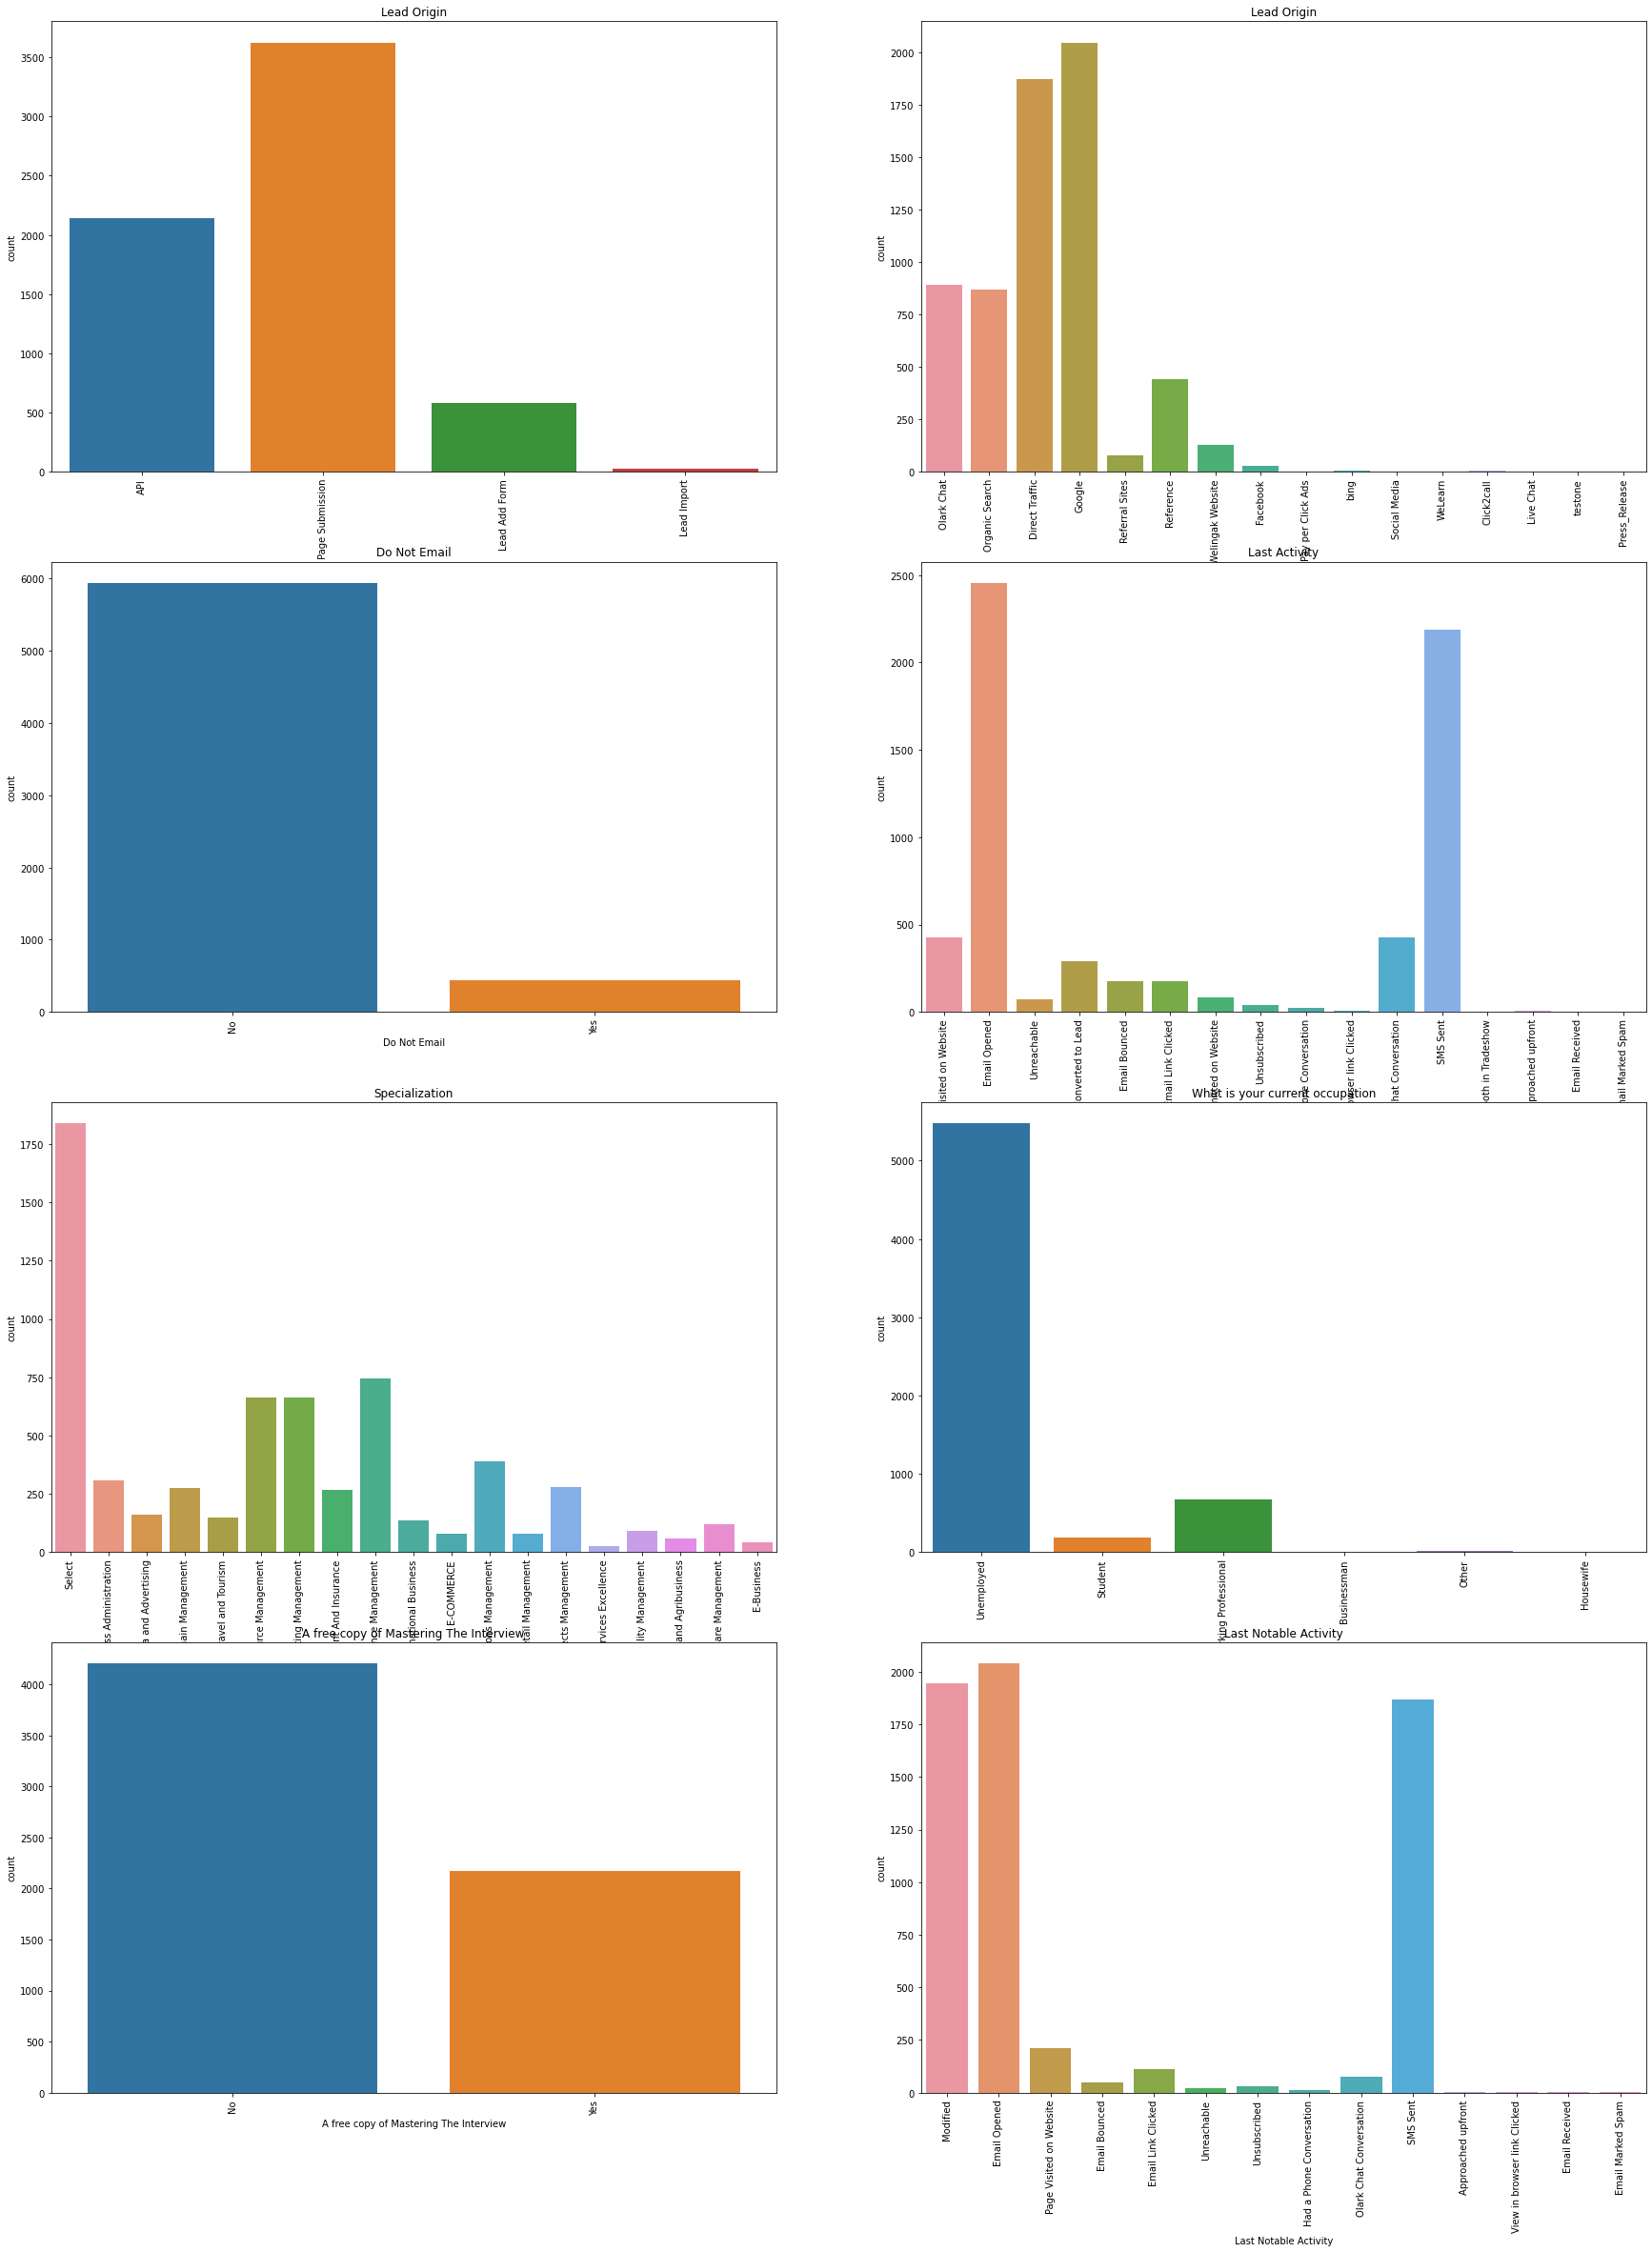

In [36]:
# Visualization of Categorical Variables

cat_var = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity' ]

plt.figure(figsize = (30,40))

plt.subplot(4,2,1)
sns.countplot(lead_scoring['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(lead_scoring['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(4,2,3)
sns.countplot(lead_scoring['Do Not Email']).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(4,2,4)
sns.countplot(lead_scoring['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(4,2,5)
sns.countplot(lead_scoring['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(4,2,6)
sns.countplot(lead_scoring['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(4,2,7)
sns.countplot(lead_scoring['A free copy of Mastering The Interview']).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,8)
sns.countplot(lead_scoring['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

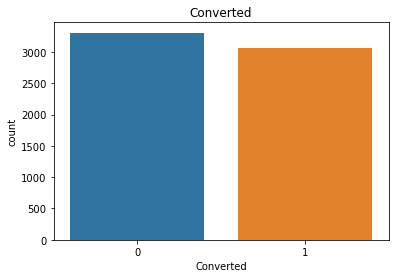

In [37]:
sns.countplot(lead_scoring['Converted'])
plt.title('Converted')
plt.show()


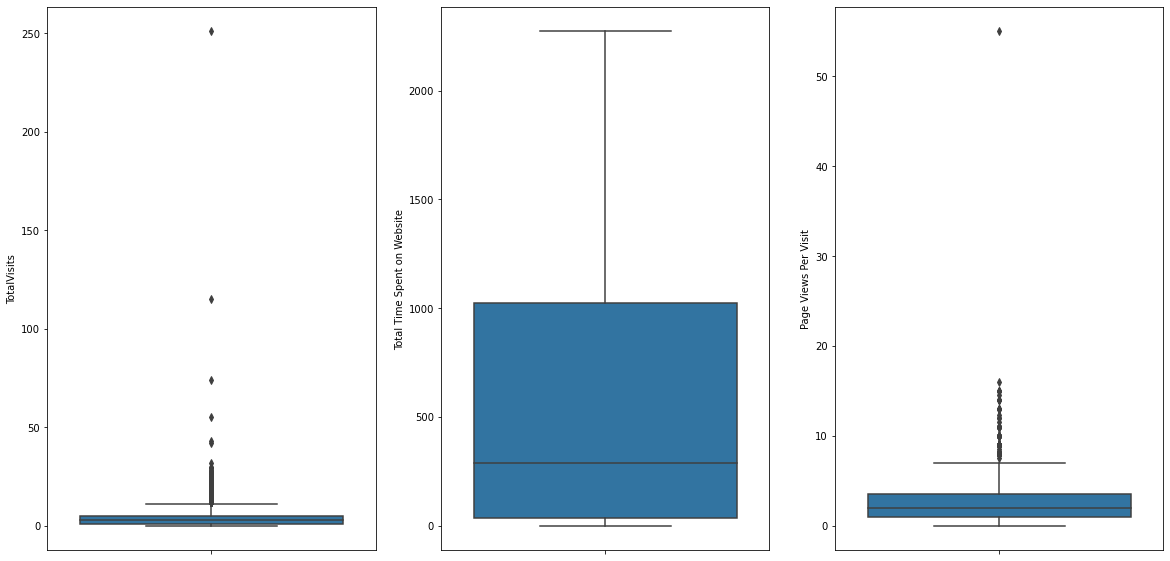

In [38]:
# Visualization of Numerical Variables

num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
sns.boxplot(y= 'TotalVisits', data = lead_scoring)
plt.subplot(1,3,2)
sns.boxplot(y= 'Total Time Spent on Website', data = lead_scoring)
plt.subplot(1,3,3)
sns.boxplot(y= 'Page Views Per Visit', data = lead_scoring)

plt.show()


# There are outliers in "TotalVisits" & "Page Views Per Visit" column. These are just a few cases and can be treated as an exception.

# Bivariate Analysis

# Relating the Categorical Columns with 'Converted' Column

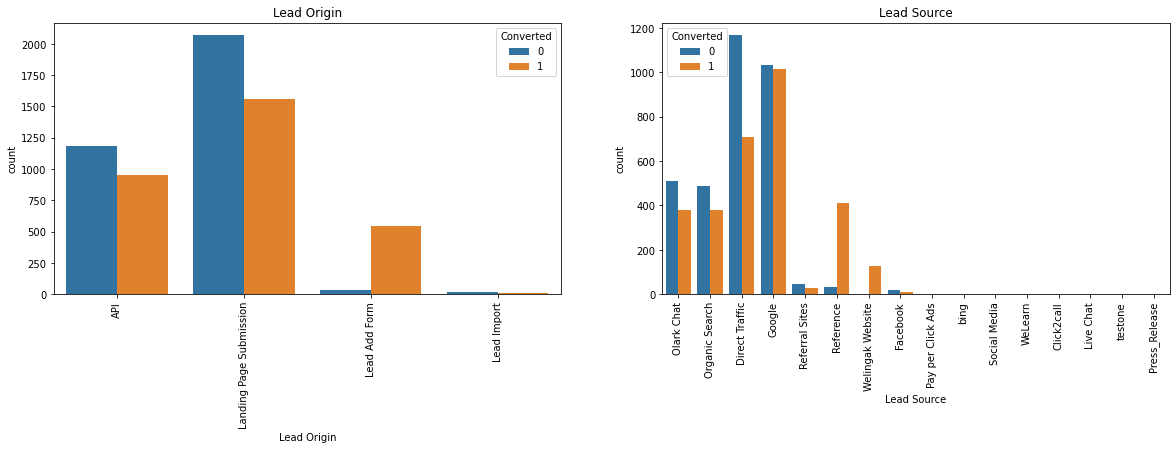

In [39]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

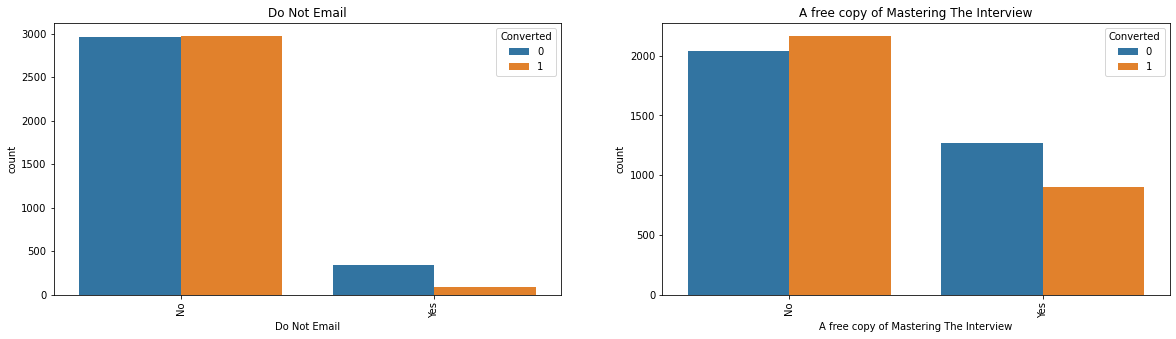

In [40]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

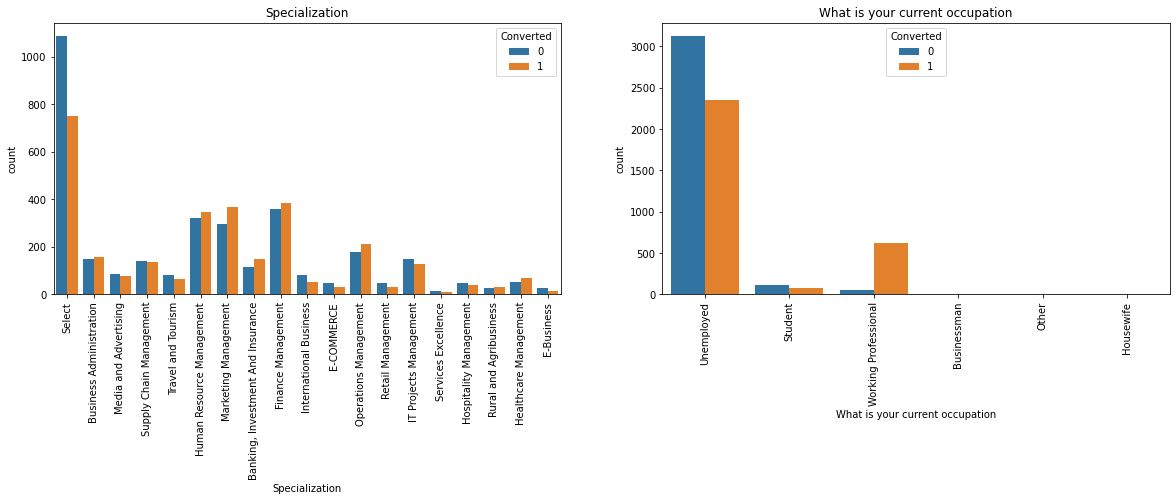

In [41]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

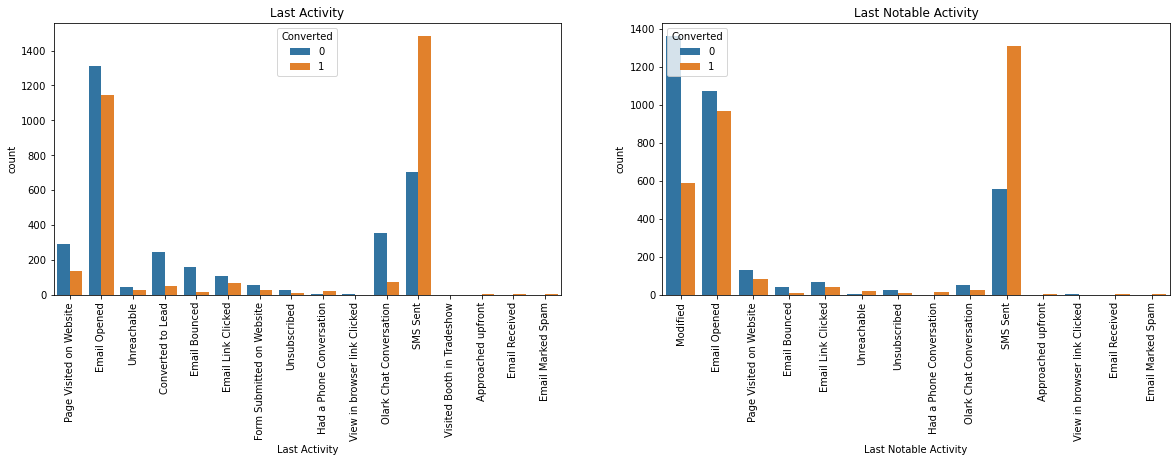

In [42]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_scoring).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

<AxesSubplot:>

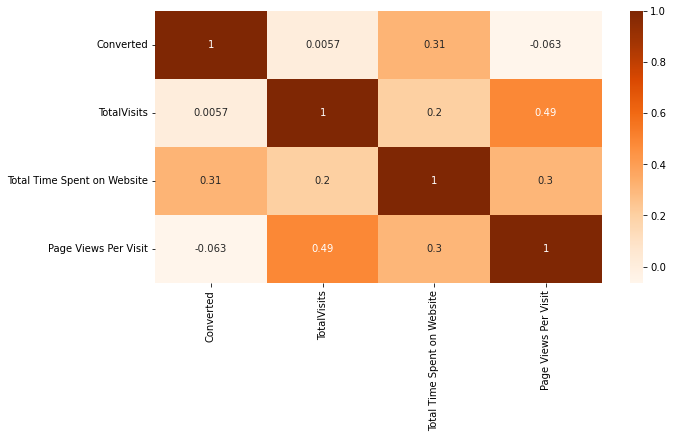

In [43]:
# Visualization of the correlation with the help of the Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(lead_scoring.corr(), annot=True, cmap = "Oranges")     

# From the Heaatmap it is evident that there is a high correlation between 'Total Time Spent on Website' and 'Page Views Per VIsit'

## Data Preperation for Modelling

# 5) Encoding the Categorical Columns 

In [44]:
lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [45]:
# Create dummy variable for the categorical columns

dummy = pd.get_dummies(lead_scoring[['Lead Origin','Lead Source','Do Not Email',
                                     'Last Activity','What is your current occupation',
                                     'A free copy of Mastering The Interview','Last Notable Activity']], 
                                      drop_first=True)

lead_scoring = pd.concat([lead_scoring, dummy], axis=1)

In [46]:
# Creating dummy variable separately for the variable 'Specialization' since it has the value 'Select' 
# which is not insignificant for the analysis
# Drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(lead_scoring['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
lead_scoring = pd.concat([lead_scoring, dummy_spl], axis = 1)

In [47]:
# Drop the variables for which the dummy variables are created

lead_scoring = lead_scoring.drop(['Lead Origin','Lead Source','Do Not Email',
                                     'Last Activity','Specialization','What is your current occupation',
                                     'A free copy of Mastering The Interview','Last Notable Activity'],1)

In [48]:
# Check the Dataset after dropping the variables

lead_scoring.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 6) Splitting the data into Training and Testing Sets

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
np.random.seed(0)
lead_scoring_train, lead_scoring_test = train_test_split(lead_scoring, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
lead_scoring_train.shape

(4461, 75)

In [52]:
lead_scoring_test.shape

(1912, 75)

# 7) Dividing into X and Y sets for Model Building

In [53]:
X_train = lead_scoring_train
y_train = lead_scoring_train.pop('Converted')

In [54]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y_train.head()

8003    0
218     0
4171    1
4037    1
3660    1
Name: Converted, dtype: int64

# 8) Rescaling the data

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
lead_scoring_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(lead_scoring_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [58]:
lead_scoring_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.014528,0.234426,0.153604,0.564672,0.094149,0.003587,0.290069,0.003587,0.320108,0.000448,...,0.044385,0.023089,0.104237,0.023313,0.058507,0.014571,0.008742,0.002690,0.040126,0.022192
std,0.021712,0.248618,0.127910,0.495856,0.292069,0.059788,0.453845,0.059788,0.466570,0.021171,...,0.205971,0.150203,0.305602,0.150913,0.234726,0.119840,0.093102,0.051801,0.196276,0.147325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003984,0.014525,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.125440,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.448504,0.229375,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Correlation Table

lead_scoring.corr()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


# 9) Model Building (Logistic Regression)

In [60]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [61]:
# Import RFE
from sklearn.feature_selection import RFE

In [62]:
# Running RFE with 15 variables as output
rfe = RFE(lr,15)
rfe = rfe.fit(X_train, y_train)

In [63]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [65]:
X_train= X_train[col]

In [66]:
# Import statsmodels

import statsmodels.api as sm

In [67]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

# Model 1

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 27 Dec 2022   Deviance:                       4145.5
Time:                        15:29:52   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [68]:
# Quite a few variables have the 'P' value greate than 0.05 which needs to be looked upon.
# We should look at the VIF to decide the treatment for variables with 'P' value greater than 0.05

In [69]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [71]:
# The VIF is high for only 3 variables 'Lead Origin_Lead Add Form', 'Lead Source_Reference', 'Lead Source_Welingak Website'
# Drop 'Lead Origin_Lead Add Form' as it's VIF and P value is on a higher side

In [72]:
X_train.drop(['Lead Source_Reference'], axis = 1, inplace = True)

In [73]:
# Refit the model with new set of features

# Model 2

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 27 Dec 2022   Deviance:                       4146.5
Time:                        15:29:52   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


In [75]:
# The VIF values are well below 5
# So we need to drop variables with high P values

In [76]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation'], axis=1, inplace = True)

In [77]:
# Refit the model with new set of features

# Model 3

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 27 Dec 2022   Deviance:                       4152.2
Time:                        15:29:53   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [78]:
# Drop 'What is your current occupation_Housewife' variable as the P value is very high

X_train.drop(['What is your current occupation_Housewife'], axis=1, inplace = True)

In [79]:
# Refit the model with new set of features

# Model 4

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 27 Dec 2022   Deviance:                       4156.7
Time:                        15:29:53   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [80]:
# Drop 'What is your current occupation_Working Professional' variable as the P value is high

X_train.drop(['What is your current occupation_Working Professional'], axis=1, inplace = True)

In [81]:
# Refit the model with new set of features

# Model 5

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 27 Dec 2022   Deviance:                       4158.1
Time:                        15:29:53   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [82]:
# All the P values are less than 0.05.
# We will once again check the VIF values 

In [83]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


In [84]:
# The VIF's of all the features are less than 5

# 10) Model Evaluation

# All the VIF's are below 5 and the P values are less than 0.05. Now we can make predictions using the final set of features

In [85]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [86]:
# Reshaping into an Array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [87]:
# A Dataframe with the actual conversion rate and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                  'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [88]:
# Creating new column Predicted with 1 if the Conversion Prob is >0.5 or else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [89]:
# Import metrics form sklearn for evaluation

from sklearn import metrics

In [90]:
# Create Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [91]:
# Predicted     Not_Churn     Churn
# Actual        1929           383
# Not_Churn      560          1589


In [92]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7886124187401928

# The accuracy is at 78.86%

In [93]:
# Evaluation of other metrics

# Substituting the value of true positives
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1] 

# Substituting the value of false negatives
FN = confusion[1,0]

In [94]:
# Calculating Sensitivity

TP/(TP+FN)


0.739413680781759

In [95]:
# Calculating Specificity

TN/(TN+FP)

0.8343425605536332

In [96]:
# With the current cut off as 0.5 the accuracy is at 78.86%, Sensivity at 73.94% & Specificity at 83.43%

# 11) Optimal Cut Off (ROC Curve)

In [97]:
# The cut off of 0.5 was randomly selected. Now we need to find the optimum one

In [98]:
# ROC Function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

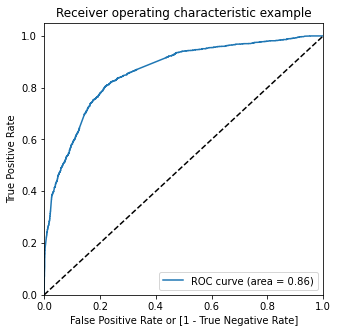

In [100]:
# Call the ROC Function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# The area under the ROC curve is 0.86 and is a good value

In [101]:
# Create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# Create a Dataframe to see the values of accuracy, sensitivity and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positives 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


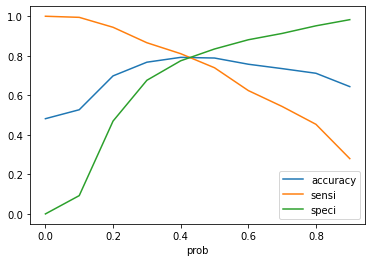

In [103]:
# Plotting the dataframe with accuracy, sensitivity and specificity

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the plot it can be observed that 0.42 is the Optimal value of the 3 metrics. So let's consider 0.42 as the cutoff

In [104]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [105]:
# Check the Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7908540685944856

In [106]:
# Check the Confusion Matrix

confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion1

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [107]:
# Evaluation of other metrics

# Substituting the value of true positives
TP = confusion1[1,1]

# Substituting the value of true negatives
TN = confusion1[0,0]

# Substituting the value of false positives
FP = confusion1[0,1] 

# Substituting the value of false negatives
FN = confusion1[1,0]

In [108]:
# Calculating Sensitivity

TP/(TP+FN)

0.793392275476966

In [109]:
# Calculating Specificity

TN/(TN+FP)

0.7884948096885813

In [110]:
# With the current cut off as 0.42 the accuracy is at 79.09%, Sensivity at 79.34% & Specificity at 78.85%
# The cut off point seems good to go...

# 12) Predictions on Test Set

In [111]:
# Resclaing the Data

lead_scoring_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(lead_scoring_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [112]:
lead_scoring.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Dividing into X and Y sets

X_test = lead_scoring_test
y_test = lead_scoring_test.pop('Converted')

In [114]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
y_test.head()

4771    1
6122    0
9202    0
6570    1
2668    1
Name: Converted, dtype: int64

In [116]:
# Select the columns from X_train for X_test

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [117]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [118]:
# Drop the required columns from X_test

X_test.drop(['Lead Source_Reference','Last Notable Activity_Had a Phone Conversation',
             'What is your current occupation_Housewife','What is your current occupation_Working Professional'],
           1, inplace = True)

In [119]:
X_test

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5828,0.011952,0.027289,0,0,0,0,0,1,0,1,0
6583,0.011952,0.152289,0,0,0,0,0,1,0,1,0
5531,0.055777,0.702025,0,0,0,0,0,0,0,1,0
3056,0.011952,0.417694,0,0,0,1,0,1,0,1,0


In [120]:
# Making predictions on the Test Set

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [121]:
# Converting y_pred to a Dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [122]:
# Converting y_test to a Dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4771,1
6122,0
9202,0
6570,1
2668,1


In [123]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [124]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [125]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [126]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Final_Predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [127]:
# Check the Overall Accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7845188284518828

In [128]:
# Check Confusion Matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [129]:
# Evaluation of other metrics

# Substituting the value of true positives
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [130]:
# Calculate sensitivity
TP / float(TP+FN)

0.7794759825327511

In [131]:
# Calculate specificity
TN / float(TN+FP)

0.7891566265060241

# 13) Precision-Recall View

In [132]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

# Precision

# TP/(TP+FN)


In [133]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

# Recall

# TP/(TP+FP)

In [134]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

# Precision & Recall TradeOff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [137]:

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

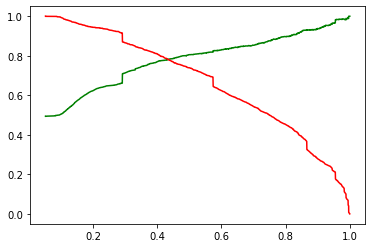

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1,1


In [140]:
# Check the accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [141]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [142]:
# Evaluation of other metrics

# Substituting the value of true positives
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Calculate Precision

TP/(TP+FP)

0.784037558685446

In [144]:
# Calculate Recall

TP/(TP+FN)

0.7771056305258259

In [145]:
# The new cut off of 0.44 is good to go

# Making Predictions on the Test Data

In [146]:
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [147]:
# Converting y_test to a Dataframe

y_test_1 = pd.DataFrame(y_test_pred)
y_test_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [148]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [149]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [152]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [153]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [154]:
# Check Overall Accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [155]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [213, 703]], dtype=int64)

In [156]:
# Evaluation of other metrics

# Substituting the value of true positives
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [157]:
# Calculate Precision

TP/(TP+FP)

0.7828507795100222

In [158]:
# Calculate Recall

TP/(TP+FN)

0.767467248908297